In [1]:
from compute import Var, eqvar
#from inputresolver import reassigneq, eqvars, eqsonly, default_out, mdf_order, default_in, idx_eqlist
import numpy as np
import sympy as sp
#import networkx as nx
#from representations import draw, bipartite_repr, digraph_repr
from api import Model, adda, addf, addsolver, setsolvefor, addobj, addineq

ModuleNotFoundError: No module named 'api'

In [3]:
from partitioner import default_out_condensation, merge

In [4]:
b = [2, 2.5, 3]
w = np.array([1.3, 1.5, 1.2])
a1e = 0.2

In [49]:
x1 = Var('x_1')
x2 = Var('x_2')
x3 = Var('x_3')
a2 = Var('a_2')
a3 = Var('a_3')
a1, eq0 = eqvar('a_1', 0.1*x1*a2+0.8*x1*a3+b[0])
eq1 = (a2, x2*a3+b[1])
eq2 = (a3, 0.1*x3*a1+0.8*x3*a2+b[2])
a4, eq3 = eqvar('a_4', (a1-a1e)**2+sp.Matrix([x1**2,x2**2,x3**2]).dot(w**2))

In [50]:
eq_list = [eq0, eq1, eq2, eq3]
eqs = idx_eqlist(eq_list)
eqv = eqvars(eqs)
eqv

{0: {a_1, a_2, a_3, x_1},
 1: {a_2, a_3, x_2},
 2: {a_1, a_2, a_3, x_3},
 3: {a_1, a_4, x_1, x_2, x_3}}

In [51]:
def sel(eqs, idx):
    return {k:v for k,v in eqs.items() if k in idx}

In [78]:
s1 = (1,2)
eqvs1 = sel(eqv, s1)
douts1 = default_out(sel(eqs, s1))

In [79]:
eqvs1, douts1

({1: {a_2, a_3, x_2}, 2: {a_1, a_2, a_3, x_3}}, {1: a_2, 2: a_3})

In [80]:
D1, edges = digraph_repr(eqvs1, douts1, intermediary=True)

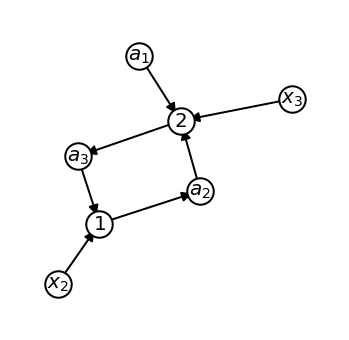

In [81]:
draw(D1, node_shape='o')

In [82]:
s2 = (0,3)
eqvs2 = sel(eqv, s2)
douts2 = default_out(sel(eqs, s2))
D2, edges = digraph_repr(eqvs2, douts2, intermediary=True)

In [83]:
edges = merge(eq_list, [eq0, eq1], 'p_1')
edges += merge(eq_list, [eq2, eq3], 'p_2')

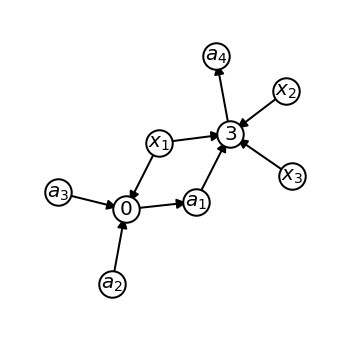

In [84]:
draw(D2, node_shape='o')

In [71]:
edges

((a_3, 'p_1'),
 (x_2, 'p_1'),
 (x_1, 'p_1'),
 ('p_1', a_2),
 ('p_1', a_1),
 (x_2, 'p_2'),
 (a_1, 'p_2'),
 (x_1, 'p_2'),
 (a_2, 'p_2'),
 (x_3, 'p_2'),
 ('p_2', a_3))

In [61]:
DG = nx.DiGraph(edges)

In [62]:
DG.edges()

OutEdgeView([(a_3, 'p_1'), ('p_1', a_2), ('p_1', a_1), (x_2, 'p_1'), (x_2, 'p_2'), (x_1, 'p_1'), (x_1, 'p_2'), (a_2, 'p_2'), (a_1, 'p_2'), ('p_2', a_3), (x_3, 'p_2')])

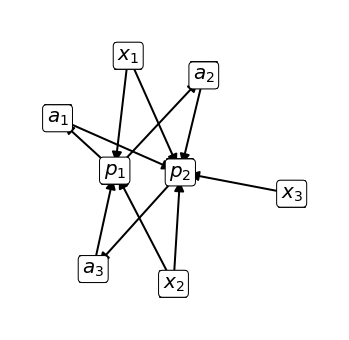

In [63]:
draw(DG, node_shape='b', prog='fdp')